In [1]:
import pandas as pd
import numpy as np

cancer_df = pd.read_csv("../data/cancer.data",names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])

cancer_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
cancer_df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [3]:
cancer_df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
cancer_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
cancer_df= cancer_df.replace('?', np.nan)

In [7]:
for col in cancer_df:
    # Check if the column is of object type
    if cancer_df[col].dtypes == 'object':
        # Impute with the most frequent value
        cancer_df = cancer_df.fillna(cancer_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
cancer_df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
# Import LabelEncoder
# ... YOUR CODE FOR TASK 6 ...
from sklearn.preprocessing import LabelEncoder 
# Instantiate LabelEncoder
le = LabelEncoder()

# ... YOUR CODE FOR TASK 6 ...

# Iterate over all the values of each column and extract their dtypes
for col in cancer_df.columns.values:
    # Compare if the dtype is object
    if cancer_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        cancer_df[col]=le.fit_transform(cancer_df[col])
cancer_df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,0,3,1,1,2
1,1002945,5,4,4,5,7,1,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,0,3,1,1,2


In [9]:
cancer_df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [10]:
cancer_df["Class"].replace([2,4],[0,1],inplace=True)

In [11]:
# ... YOUR CODE FOR TASK 7 ...
cancer_df = cancer_df.values

In [12]:
from sklearn.model_selection import train_test_split

# Segregate features and labels into separate variables
X,y = cancer_df[:,0:10] , cancer_df[:,10]
print(X)
print(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

[[1000025       5       1 ...       3       1       1]
 [1002945       5       4 ...       3       2       1]
 [1015425       3       1 ...       3       1       1]
 ...
 [ 888820       5      10 ...       8      10       2]
 [ 897471       4       8 ...      10       6       1]
 [ 897471       4       8 ...      10       4       1]]
[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0

In [13]:
# Import MinMaxScaler
# ... YOUR CODE FOR TASK 8 ...
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

/home/kevin/logistic/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.9653679653679653


array([[151,   3],
       [  5,  72]])

In [16]:
import statsmodels.api as sm


In [17]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [18]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.961373 using {'max_iter': 100, 'tol': 0.01}


/home/kevin/logistic/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [43]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, logreg.predict(rescaledX_test)))
print("Precision:",metrics.precision_score(y_test, logreg.predict(rescaledX_test)))
print("Recall:",metrics.recall_score(y_test, logreg.predict(rescaledX_test)))
print("f1 score:",metrics.f1_score(y_test, logreg.predict(rescaledX_test)))


Accuracy: 0.9653679653679653
Precision: 0.96
Recall: 0.935064935064935
f1 score: 0.9473684210526316


In [19]:

from sklearn.metrics import roc_curve, roc_auc_score

In [37]:
log_roc_auc = roc_auc_score(y_test, logreg.predict(rescaledX_test))
print(log_roc_auc)

0.9577922077922079


In [38]:
fpr, tpr, thresholds= roc_curve(y_test, logreg.predict_proba(rescaledX_test)[:,1])

In [39]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.00649351 0.00649351 0.01298701 0.01298701
 0.01948052 0.01948052 0.91558442 0.92857143 1.        ]
[0.01298701 0.67532468 0.67532468 0.8961039  0.8961039  0.92207792
 0.92207792 1.         1.         1.         1.        ]
[0.99979144 0.88232921 0.88066326 0.66846496 0.65551263 0.60766323
 0.59403721 0.26034258 0.01644921 0.01617567 0.01026564]


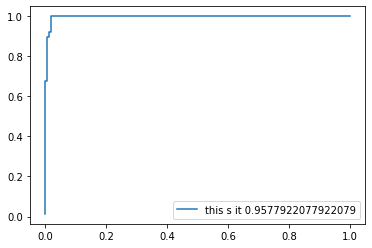

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,label='this s it ' + str(log_roc_auc))
plt.legend(loc="lower right")
plt.show()